In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [88]:
covid = pd.read_csv('owid-covid-data.csv')

In [89]:
covid.describe()

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
count,3.012000e+04,30120.000000,30120.000000,30120.000000,30056.000000,30056.000000,30056.000000,30056.000000,9.243000e+03,8844.000000,...,27283.000000,27101.000000,18132.000000,27447.000000,28357.000000,21872.000000,21614.000000,12476.000000,25012.000000,30007.000000
mean,4.184206e+04,883.078552,2336.914276,38.400996,957.103251,16.562589,37.136255,0.523218,6.433078e+05,15527.596789,...,6.030306,21734.842082,11.284210,248.995017,8.037692,11.039211,32.642025,53.538346,3.158227,74.311094
std,4.216805e+05,7980.670278,22456.306856,337.512278,2399.404591,62.374698,118.443085,2.963908,2.505799e+06,53808.953268,...,4.377218,20778.647593,18.568924,118.165279,4.105816,10.516487,13.324101,31.386613,2.558645,7.295529
min,0.000000e+00,-29726.000000,0.000000,-1918.000000,0.000000,-437.881000,0.000000,-41.023000,1.000000e+00,-3743.000000,...,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000
25%,1.800000e+01,0.000000,0.000000,0.000000,6.103000,0.000000,0.000000,0.000000,2.249100e+04,824.000000,...,2.171000,6171.884000,0.500000,152.783000,5.310000,1.900000,21.400000,22.863000,1.380000,70.600000
50%,3.350000e+02,5.000000,7.000000,0.000000,116.360500,0.639500,1.498000,0.000000,9.734000e+04,2767.500000,...,4.458000,15308.712000,1.700000,235.954000,7.110000,6.900000,31.400000,59.550000,2.540000,75.860000
75%,3.932500e+03,85.000000,86.000000,2.000000,738.831000,9.449000,17.086250,0.118000,3.763960e+05,9121.500000,...,9.720000,33132.320000,14.800000,317.840000,10.080000,19.600000,40.900000,83.741000,4.210000,80.180000
max,1.329916e+07,230051.000000,578319.000000,10489.000000,36282.826000,4944.376000,1237.551000,200.040000,4.028218e+07,823375.000000,...,18.493000,116935.600000,77.600000,724.417000,23.360000,44.000000,78.100000,98.999000,13.800000,86.750000


In [90]:
covid.shape

(30431, 34)

In [91]:
covid['location'].value_counts()

Czech Republic    198
Norway            198
France            198
Finland           198
Greece            198
                 ... 
Tajikistan         76
Comoros            75
International      64
Lesotho            62
Hong Kong          13
Name: location, Length: 212, dtype: int64

In [92]:
covid.describe(include="O")
#including only catogorical value

,iso_code,continent,location,date,tests_units
count,30367,30169,30431,30431,10736
unique,211,6,212,198,5
top,ITA,Europe,Czech Republic,30-06-2020,tests performed
freq,198,8399,198,211,4871


In [93]:
covid.isna().any()

iso_code                            True
continent                           True
location                           False
date                               False
total_cases                         True
new_cases                           True
total_deaths                        True
new_deaths                          True
total_cases_per_million             True
new_cases_per_million               True
total_deaths_per_million            True
new_deaths_per_million              True
total_tests                         True
new_tests                           True
total_tests_per_thousand            True
new_tests_per_thousand              True
new_tests_smoothed                  True
new_tests_smoothed_per_thousand     True
tests_units                         True
stringency_index                    True
population                          True
population_density                  True
median_age                          True
aged_65_older                       True
aged_70_older   

In [94]:
covid.isna().sum()

iso_code                              64
continent                            262
location                               0
date                                   0
total_cases                          311
new_cases                            311
total_deaths                         311
new_deaths                           311
total_cases_per_million              375
new_cases_per_million                375
total_deaths_per_million             375
new_deaths_per_million               375
total_tests                        21188
new_tests                          21587
total_tests_per_thousand           21188
new_tests_per_thousand             21587
new_tests_smoothed                 20390
new_tests_smoothed_per_thousand    20390
tests_units                        19695
stringency_index                    5810
population                            64
population_density                  1352
median_age                          3007
aged_65_older                       3400
aged_70_older   

In [95]:
india_case=covid[covid['location']=="India"]

In [96]:
india_case.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
12708,IND,Asia,India,31-12-2019,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12709,IND,Asia,India,01-01-2020,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12710,IND,Asia,India,02-01-2020,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12711,IND,Asia,India,03-01-2020,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12712,IND,Asia,India,04-01-2020,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66


In [97]:
india_case.tail()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
12900,IND,Asia,India,11-07-2020,820916.0,27114.0,22123.0,519.0,594.865,19.648,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12901,IND,Asia,India,12-07-2020,849553.0,28637.0,22674.0,551.0,615.616,20.751,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12902,IND,Asia,India,13-07-2020,878254.0,28701.0,23174.0,500.0,636.414,20.798,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12903,IND,Asia,India,14-07-2020,906752.0,28498.0,23727.0,553.0,657.065,20.651,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12904,IND,Asia,India,15-07-2020,936181.0,29429.0,24309.0,582.0,678.390,21.325,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66


In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

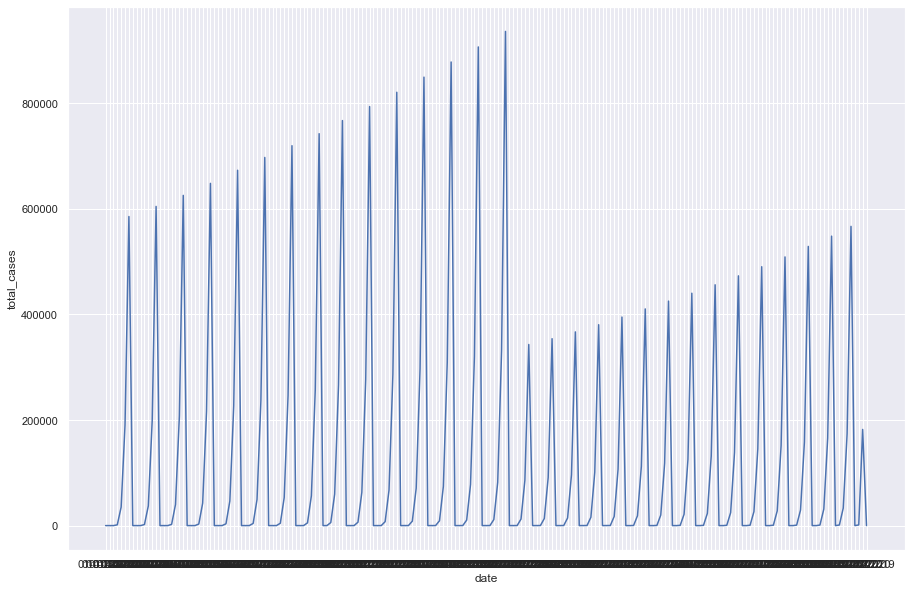

In [99]:
sns.set(rc={'figure.figsize':(15,10)}) #lenght=>15,breadth=>10
sns.lineplot(x='date',y="total_cases",data=india_case)
plt.show()

In [100]:
india_last_5_days=india_case.tail()

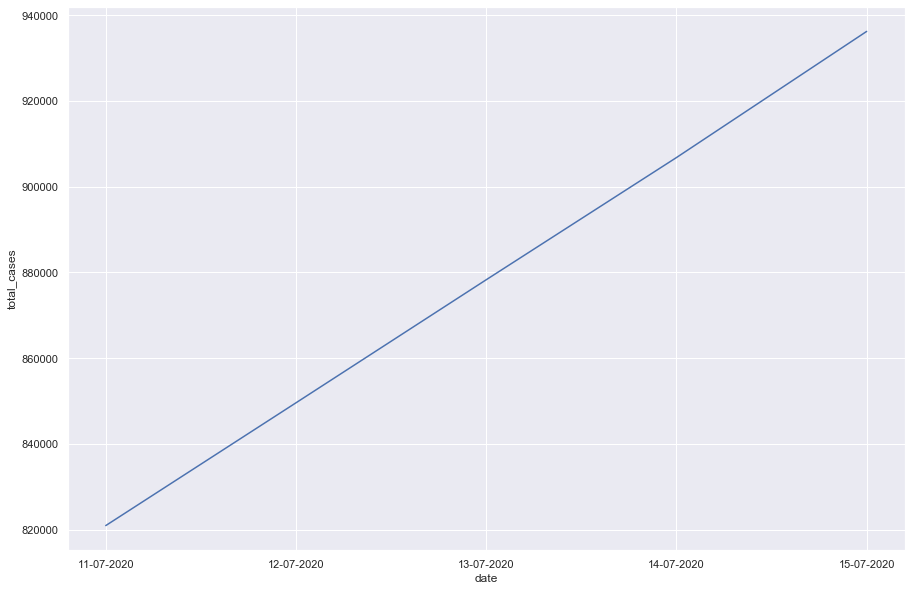

In [101]:
sns.set(rc={'figure.figsize':(15,10)}) #lenght=>15,breadth=>10
sns.lineplot(x='date',y="total_cases",data=india_last_5_days)
plt.show()

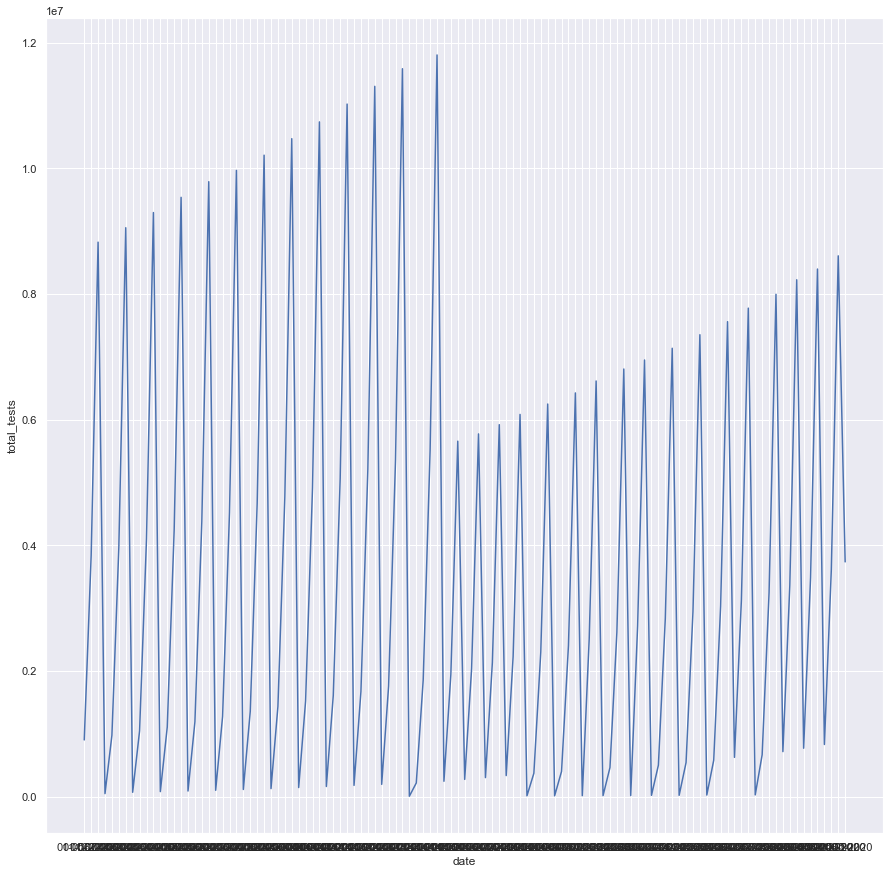

In [102]:
sns.set(rc={'figure.figsize':(15,15)}) #lenght=>15,breadth=>10
sns.lineplot(x='date',y="total_tests",data=india_case)
plt.show()

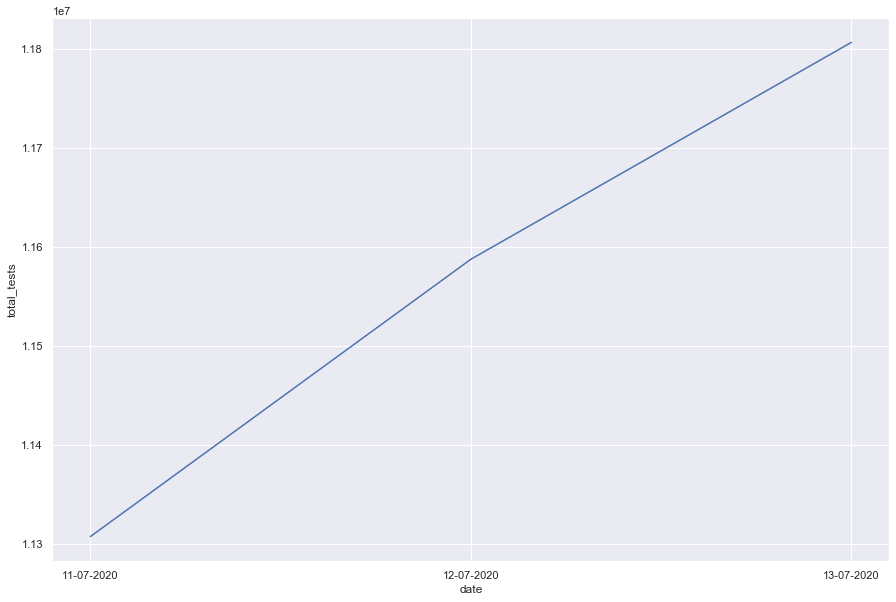

In [103]:
sns.set(rc={'figure.figsize':(15,10)}) #lenght=>15,breadth=>10
sns.lineplot(x='date',y="total_tests",data=india_last_5_days)
plt.show()

In [104]:
#brazil
brazil_case=covid[covid['location']=="Brazil"]

In [105]:
brazil_case.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
3907,BRA,South America,Brazil,31-12-2019,0.0,0.0,0.0,0.0,0.0,0.0,...,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3908,BRA,South America,Brazil,01-01-2020,0.0,0.0,0.0,0.0,0.0,0.0,...,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3909,BRA,South America,Brazil,02-01-2020,0.0,0.0,0.0,0.0,0.0,0.0,...,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3910,BRA,South America,Brazil,03-01-2020,0.0,0.0,0.0,0.0,0.0,0.0,...,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3911,BRA,South America,Brazil,04-01-2020,0.0,0.0,0.0,0.0,0.0,0.0,...,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


In [106]:
brazil_case.tail()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
4100,BRA,South America,Brazil,11-07-2020,1800827.0,45048.0,70398.0,1214.0,8472.111,211.931,...,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
4101,BRA,South America,Brazil,12-07-2020,1839850.0,39023.0,71469.0,1071.0,8655.698,183.586,...,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
4102,BRA,South America,Brazil,13-07-2020,1864681.0,24831.0,72100.0,631.0,8772.517,116.819,...,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
4103,BRA,South America,Brazil,14-07-2020,1884967.0,20286.0,72833.0,733.0,8867.954,95.437,...,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
4104,BRA,South America,Brazil,15-07-2020,1926824.0,41857.0,74133.0,1300.0,9064.873,196.919,...,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

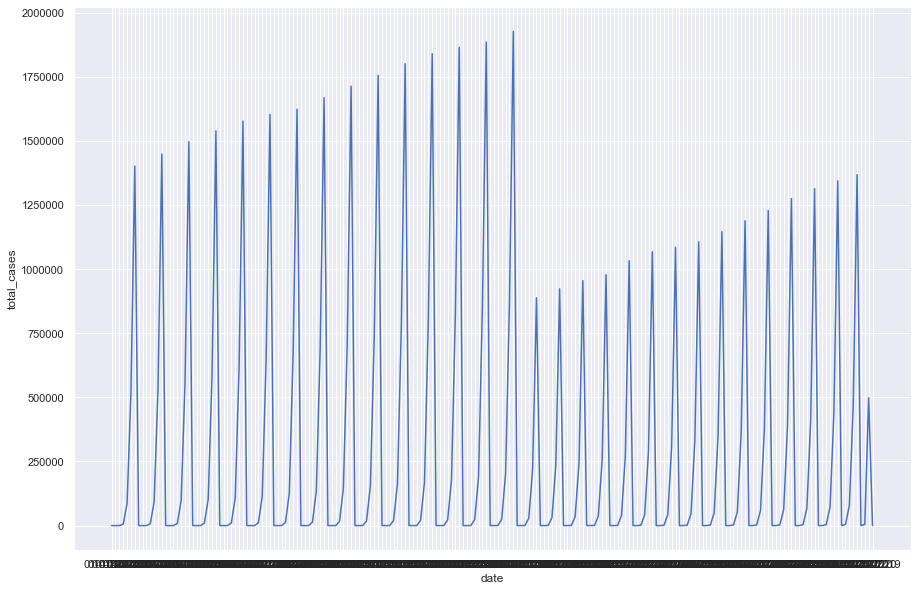

In [108]:
sns.set(rc={'figure.figsize':(15,10)}) #lenght=>15,breadth=>10
sns.lineplot(x='date',y="total_cases",data=brazil_case)
plt.show()

In [109]:
brazil_last_5_days=brazil_case.tail()

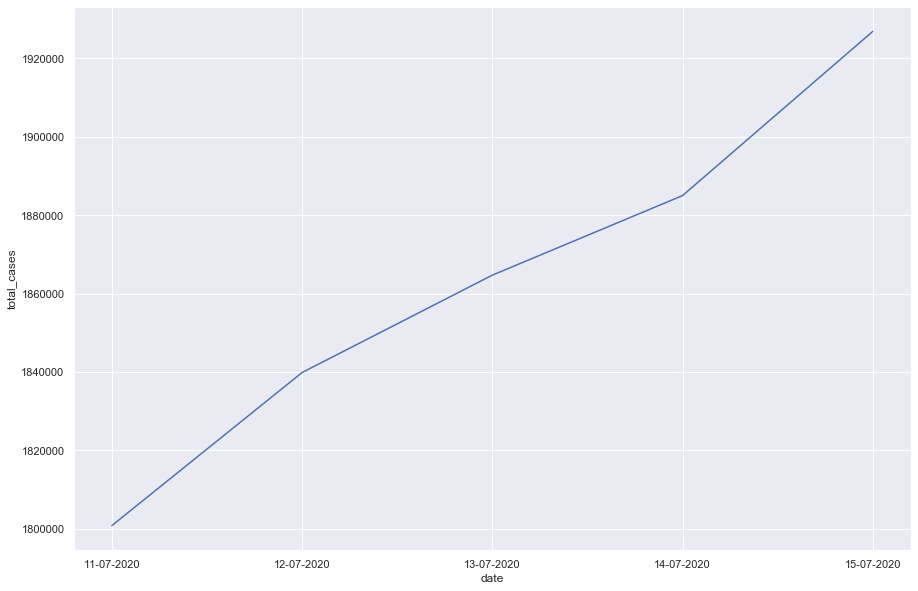

In [110]:
sns.set(rc={'figure.figsize':(15,10)}) #lenght=>15,breadth=>10
sns.lineplot(x='date',y="total_cases",data=brazil_last_5_days)
plt.show()

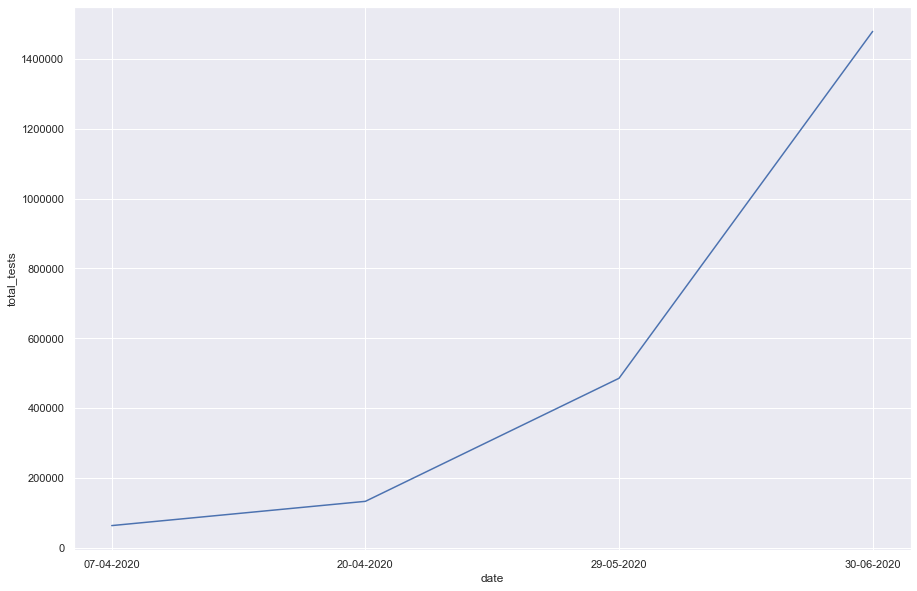

In [111]:
sns.set(rc={'figure.figsize':(15,10)}) #lenght=>15,breadth=>10
sns.lineplot(x='date',y="total_tests",data=brazil_case)
plt.show()

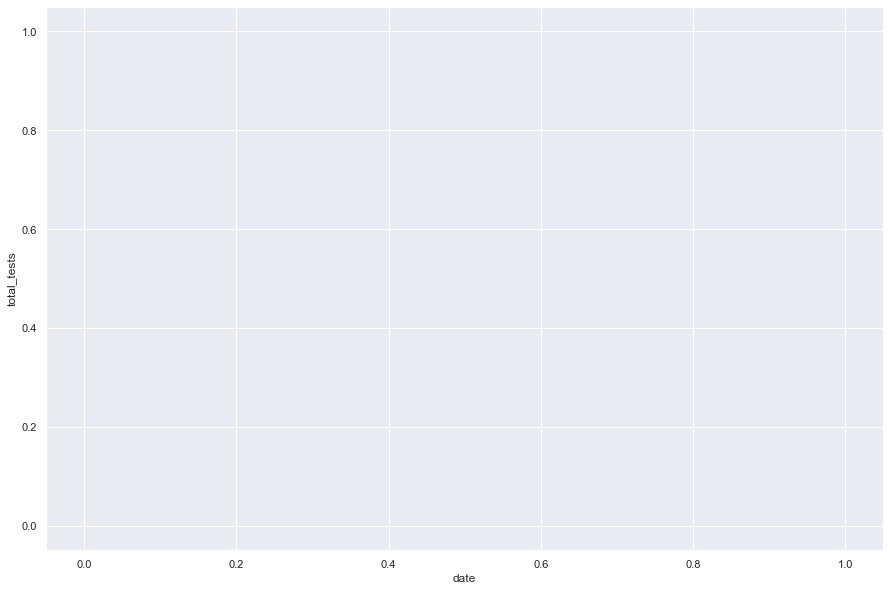

In [112]:
sns.set(rc={'figure.figsize':(15,10)}) #lenght=>15,breadth=>10
sns.lineplot(x='date',y="total_tests",data=brazil_last_5_days)
plt.show()


In [113]:
india_china=covid[(covid["location"]=="India")| (covid["location"]=="China")]

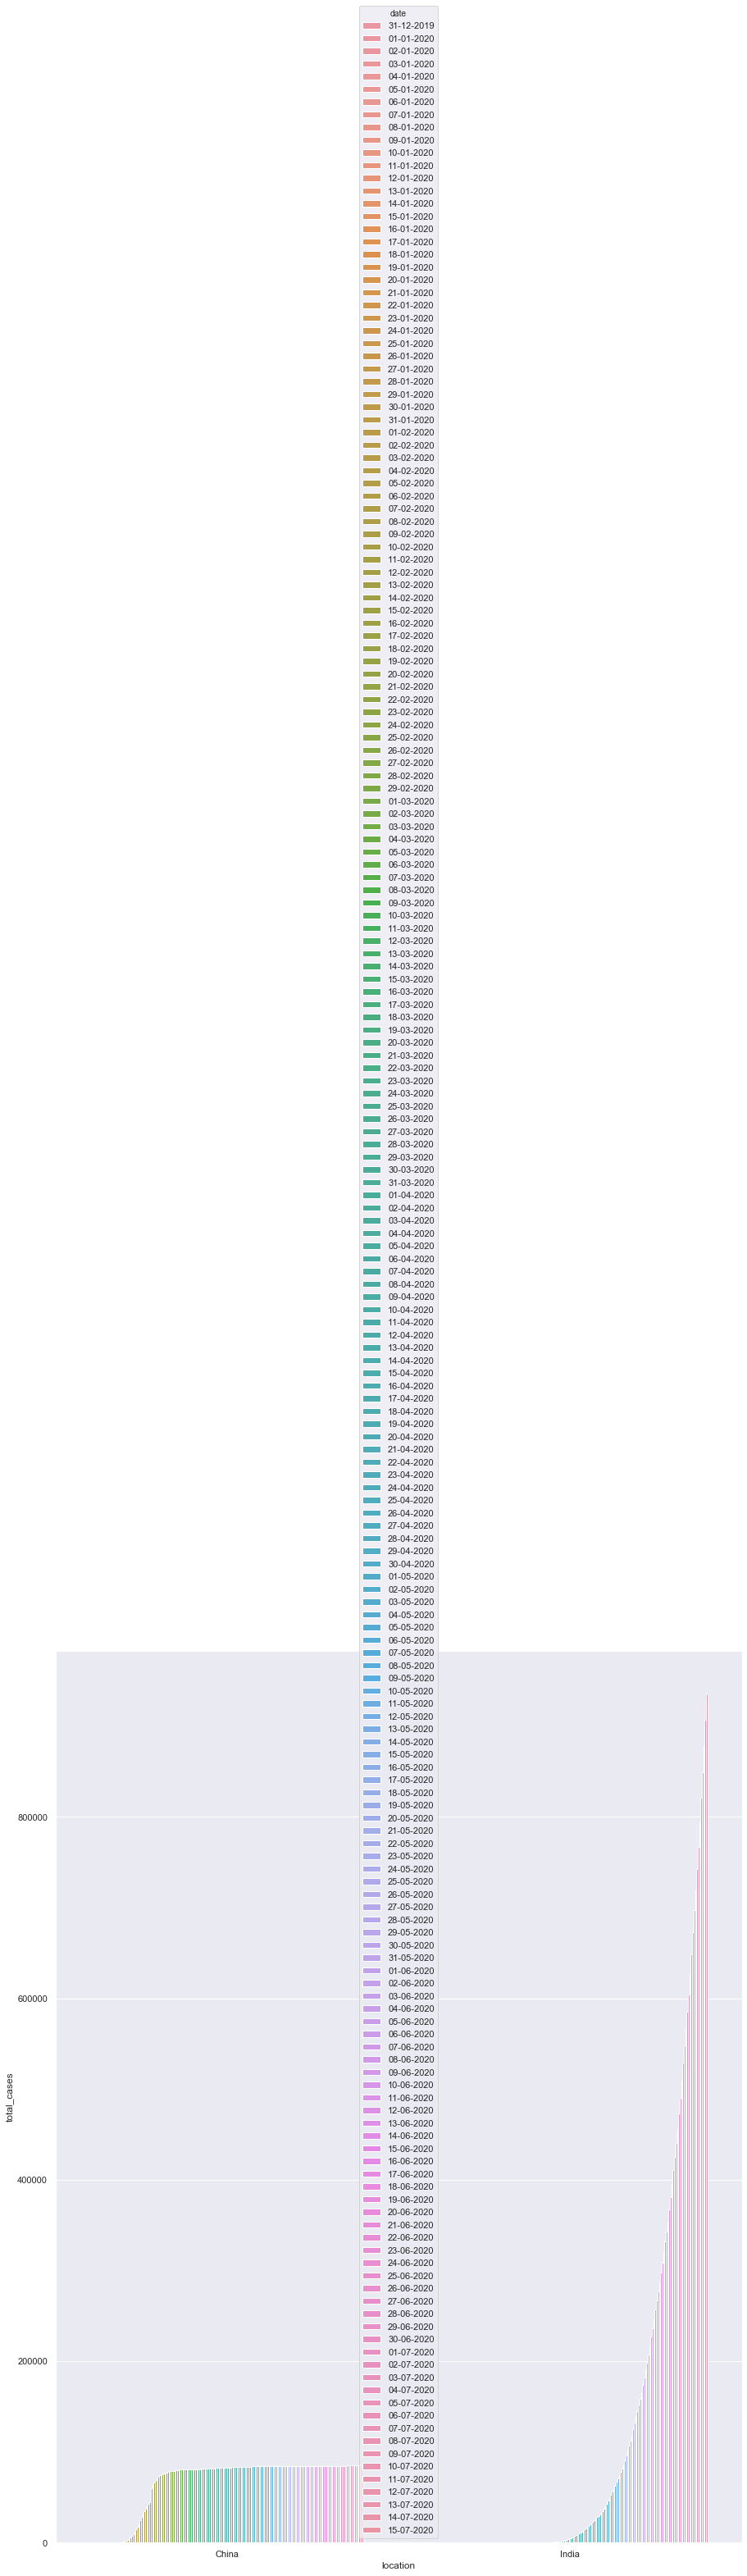

In [114]:
sns.set(rc={'figure.figsize':(15,20)}) #lenght=>15,breadth=>20
sns.barplot(x="location",y="total_cases",data=india_china,hue="date")
plt.show()

In [115]:
india_china_japan=covid[(covid["location"]=="India")| (covid["location"]=="China")| (covid["location"]=="Japan")]

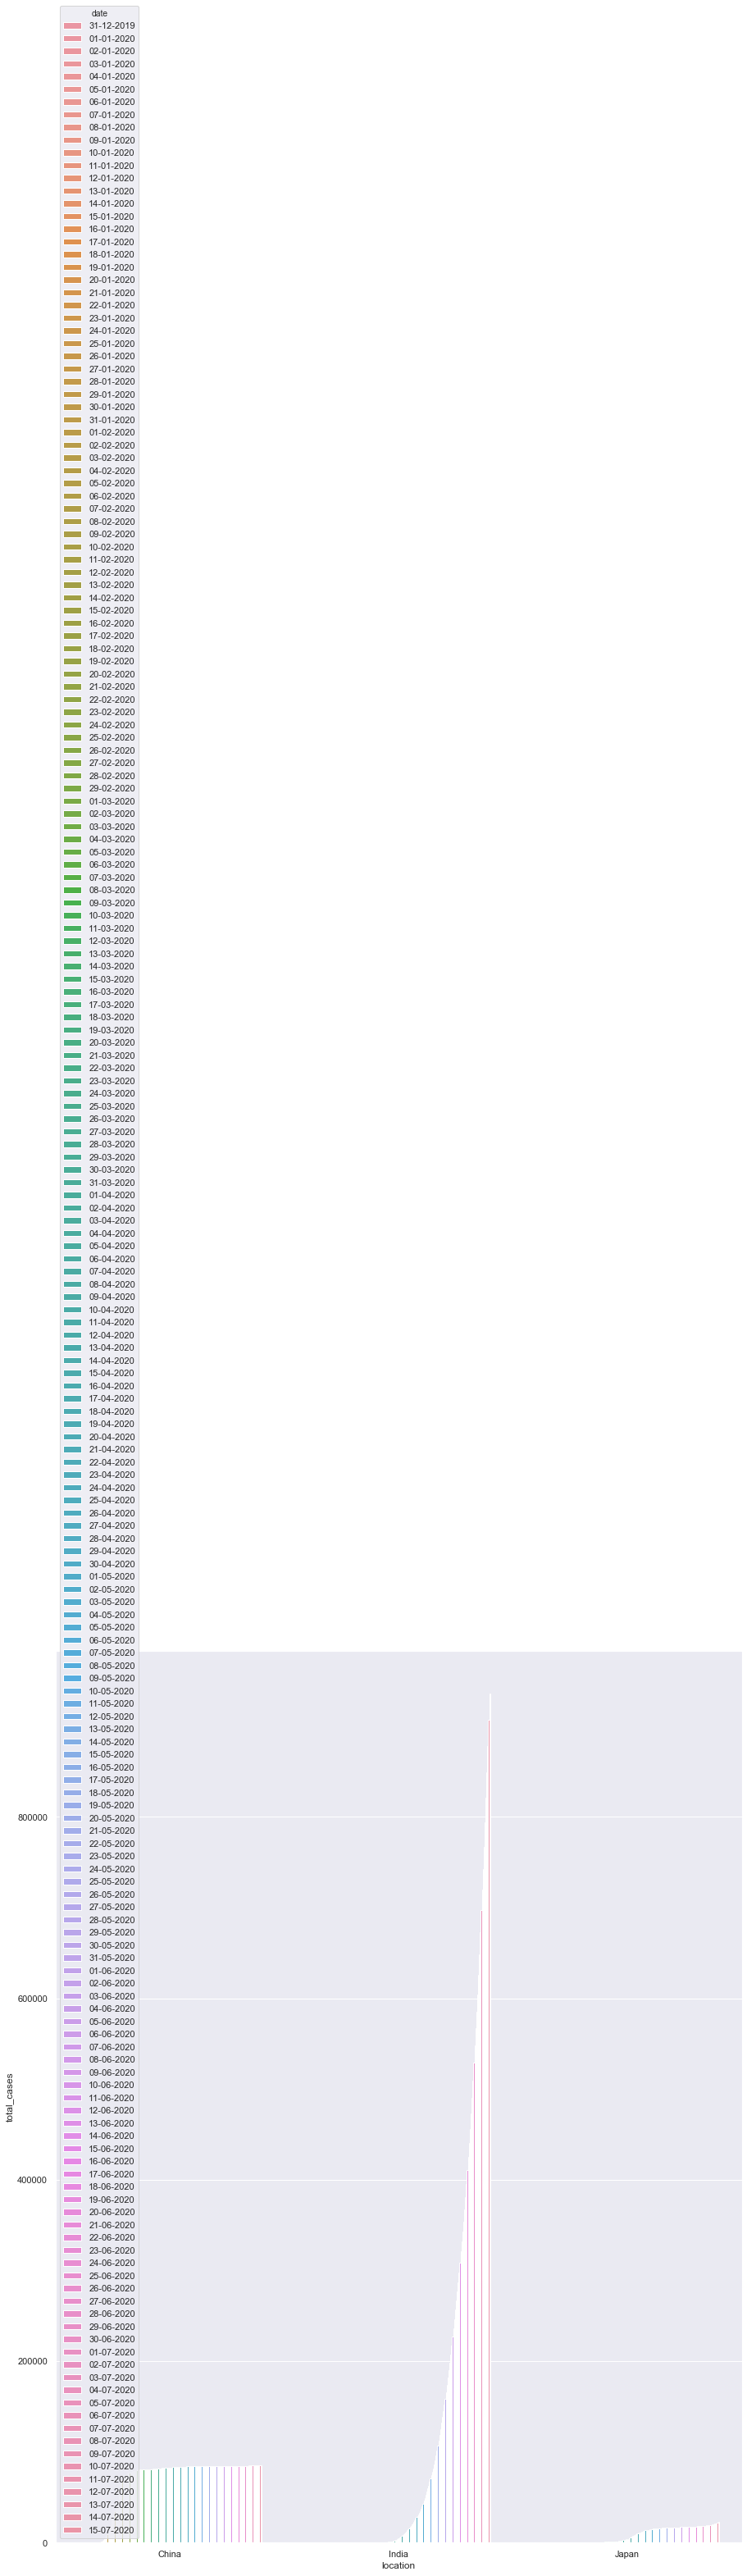

In [116]:
sns.set(rc={'figure.figsize':(15,20)}) #lenght=>15,breadth=>10
sns.barplot(x="location",y="total_cases",data=india_china_japan,hue="date")
plt.show()

In [117]:
germany_spain=covid[(covid["location"]=="Germany")| (covid["location"]=="Spain")]

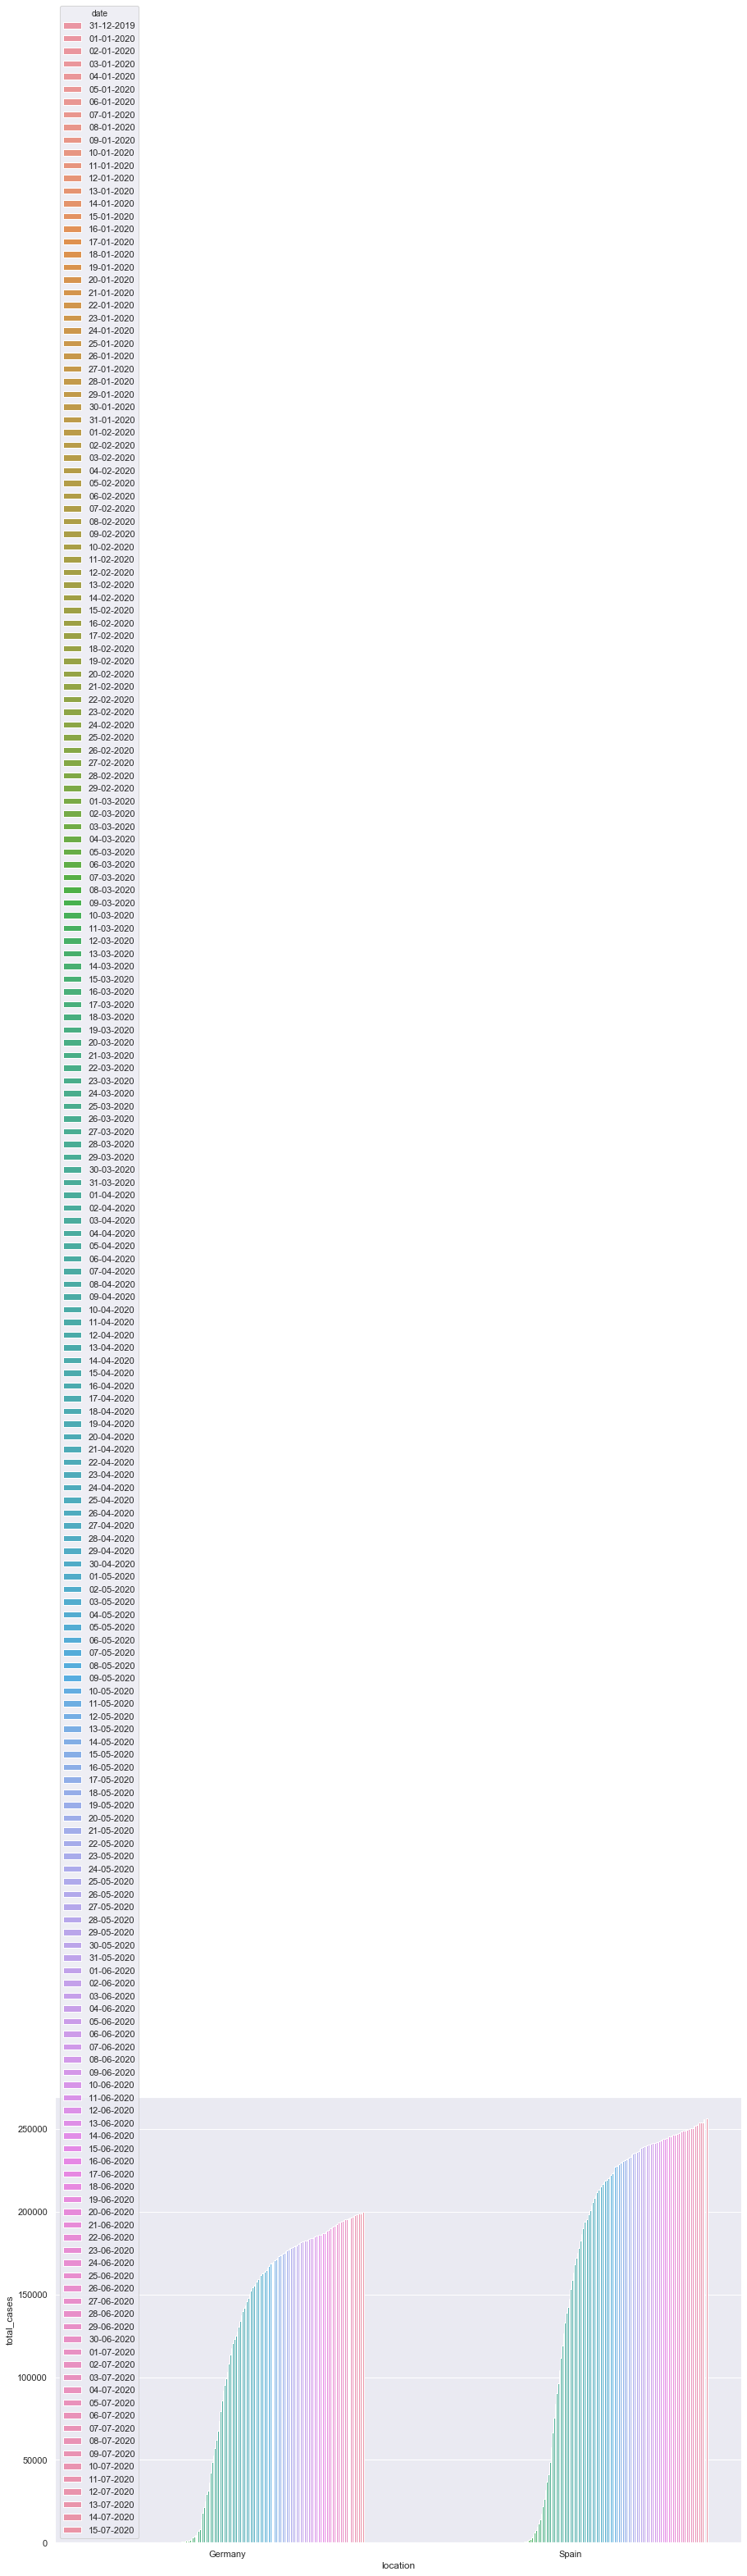

In [118]:
sns.set(rc={'figure.figsize':(15,10)}) #lenght=>15,breadth=>10
sns.barplot(x='location',y="total_cases",data=germany_spain,hue="date")
plt.show()

In [119]:
last_day_cases=covid[covid['date']=="2020-07-14"] 

In [120]:
last_day_cases

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy


In [121]:
max_cases_country=last_day_cases.sort_values(by="total_cases",ascending=False)

In [122]:
max_cases_country

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy


In [123]:
#italy_cases=covid[covid["location"]=="Italy"]

In [124]:
#sns.set(rc={'figure.figsize':(15,10)}) #lenght=>15,breadth=>10
#sns.lineplot(x='date',y="total_cases",data=italy_cases)
#plt.show()

In [125]:
max_cases_country[1:6]

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy


In [126]:
sns.barplot(x="location",y="total_cases",data=max_cases_country[1:6],hue="location")
plt.show()

In [127]:
import datetime as dt
india_case['date']=pd.to_datetime(india_case['date'])
india_case.head()

C:\Users\GEETIKA\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
12708,IND,Asia,India,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12709,IND,Asia,India,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12710,IND,Asia,India,2020-02-01,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12711,IND,Asia,India,2020-03-01,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12712,IND,Asia,India,2020-04-01,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66


In [128]:
india_case.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
12708,IND,Asia,India,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12709,IND,Asia,India,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12710,IND,Asia,India,2020-02-01,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12711,IND,Asia,India,2020-03-01,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12712,IND,Asia,India,2020-04-01,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66


In [129]:
from sklearn.linear_model import LinearRegression


In [130]:
from sklearn.model_selection import train_test_split

In [131]:
import datetime as dt
india_case['date']=india_case['date'].map(dt.datetime.toordinal)

C:\Users\GEETIKA\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [132]:
india_case.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
12708,IND,Asia,India,737424,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12709,IND,Asia,India,737425,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12710,IND,Asia,India,737456,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12711,IND,Asia,India,737485,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12712,IND,Asia,India,737516,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66


In [133]:
x=india_case['date']  #indendented variable
y=india_case['total_cases']  #dependemt varible

In [134]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [135]:
x_test

12850    737567
12761    737477
12846    737563
12723    737439
12890    737431
12848    737565
12734    737450
12892    737491
12902    737619
12794    737511
12845    737562
12714    737577
12827    737544
12865    737582
12796    737513
12749    737700
12753    737469
12747    737639
12758    737474
12742    737486
12735    737451
12754    737470
12856    737573
12775    737609
12801    737488
12727    737443
12760    737476
12741    737457
12766    737482
12873    737590
12750    737731
12855    737572
12778    737732
12752    737468
12897    737644
12772    737518
12823    737540
12831    737489
12860    737430
12883    737600
12875    737592
12716    737638
12731    737447
12896    737613
12769    737427
12783    737500
12857    737574
12851    737568
12719    737730
12858    737575
12781    737498
12807    737672
12837    737673
12834    737581
12863    737521
12870    737735
12862    737490
12869    737704
12726    737442
12812    737529
Name: date, dtype: int64

In [136]:
lr=LinearRegression()

In [137]:
import numpy as np
lr.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [138]:
india_case.tail()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
12900,IND,Asia,India,737736,820916.0,27114.0,22123.0,519.0,594.865,19.648,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12901,IND,Asia,India,737766,849553.0,28637.0,22674.0,551.0,615.616,20.751,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12902,IND,Asia,India,737619,878254.0,28701.0,23174.0,500.0,636.414,20.798,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12903,IND,Asia,India,737620,906752.0,28498.0,23727.0,553.0,657.065,20.651,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12904,IND,Asia,India,737621,936181.0,29429.0,24309.0,582.0,678.390,21.325,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66


In [139]:
#from sklearn.linear_model import LinearRegression

#y_pred=lr.predict(np.array(x_test).reshape(-1,1))

In [140]:
#Linear_regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))
y_pred = regressor.predict(np.array(x_test).reshape(-1,1))

In [141]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

43039574733.17144

In [142]:
from sklearn.metrics import r2_score
lin_reg=r2_score(y_test, y_pred)

In [143]:
#Multi_linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))
y_pred = regressor.predict(np.array(x_test).reshape(-1,1))

In [144]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

43039574733.17144

In [145]:
from sklearn.metrics import r2_score
multi_reg=r2_score(y_test, y_pred)

In [146]:
#feature_scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))
y = sc_y.fit_transform(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

In [147]:
#SVM
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))
y_pred=sc_y.inverse_transform(regressor.predict(np.array(x_test).reshape(-1,1)))

C:\Users\GEETIKA\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [148]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

1181352825291.8772

In [149]:
from sklearn.metrics import r2_score
svm=r2_score(y_test, y_pred)

In [150]:
#Decision_tree_Regression
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))
y_pred = regressor.predict(np.array(x_test).reshape(-1,1))

In [151]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

27328977259.916668

In [152]:
from sklearn.metrics import r2_score
Decision_forest=r2_score(y_test, y_pred)

In [153]:
#Random_forest_regression
from sklearn.ensemble import RandomForestRegressor
random_regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
random_regressor.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))
y_pred = random_regressor.predict(np.array(x_test).reshape(-1,1))

C:\Users\GEETIKA\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [154]:
#y_pred = regressor.predict(np.array(x_test).reshape(-1,1))
#random_regressor.predict(np.array([[737624]]))

In [155]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

26844217028.04667

In [156]:
from sklearn.metrics import r2_score
random_forest=r2_score(y_test, y_pred)

In [161]:
#lr.predict(np.array([[737624]]))

In [162]:
print('score of algorithms for this particular dataset /n')
print('Linear Regression Algorithm :',lin_reg)
print('Multi_Linear Regression Algorithm :',multi_reg)
print('SVM Regression Algorithm :',svm)
print('Decision Tree Regressor Algorithm :',Decision_forest)
print('Random Forest Regression Algorithm :',random_forest)

score of algorithms for this particular dataset /n
Linear Regression Algorithm : -0.0005539756489600922
Multi_Linear Regression Algorithm : -0.0005539756489600922
SVM Regression Algorithm : -26.463265455523256
Decision Tree Regressor Algorithm : 0.364675022526303
Random Forest Regression Algorithm : 0.37594438985256096


In [163]:
random_forest.predict(np.array([[737624]]))

array([767722.1])

In [164]:
#depolyment of model
date=int(input())


 737624


In [165]:
date=np.array([[date]])
random_regressor.predict(date)

array([767722.1])